In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
#loading data
customers_df = pd.read_csv(r"C:\Users\girir\Downloads\shop.zip")

In [3]:
customers_df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
customers_df.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [5]:
customers_df.shape

(2000, 8)

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [7]:
# checking for null values
customers_df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [8]:
customers_df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [9]:
# checking for duplicate
customers_df.duplicated().sum()

0

In [10]:
# Basic EDA: Descriptive statistics and pairplot
print(customers_df.describe())

        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.00

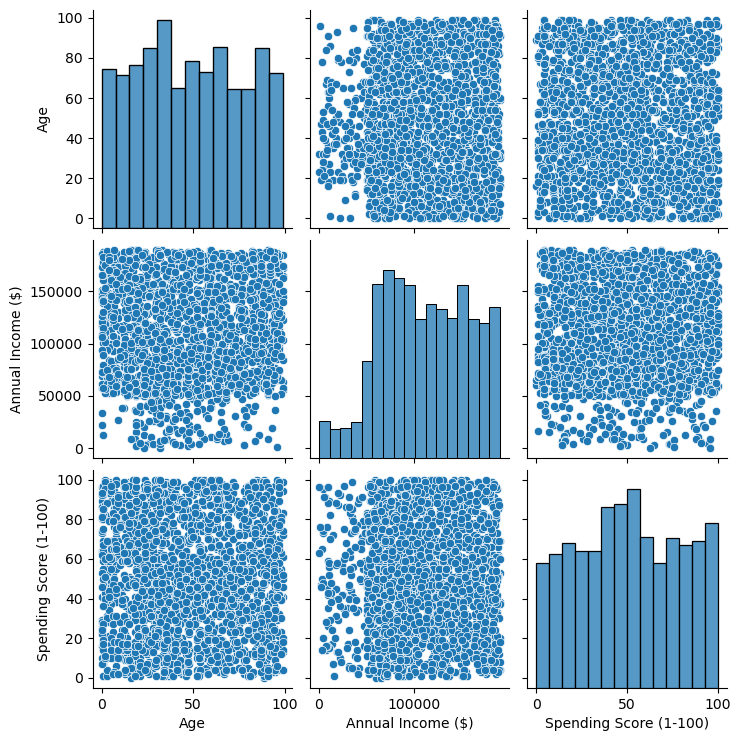

In [11]:
# Pairplot to visualize relationships
sns.pairplot(customers_df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']])

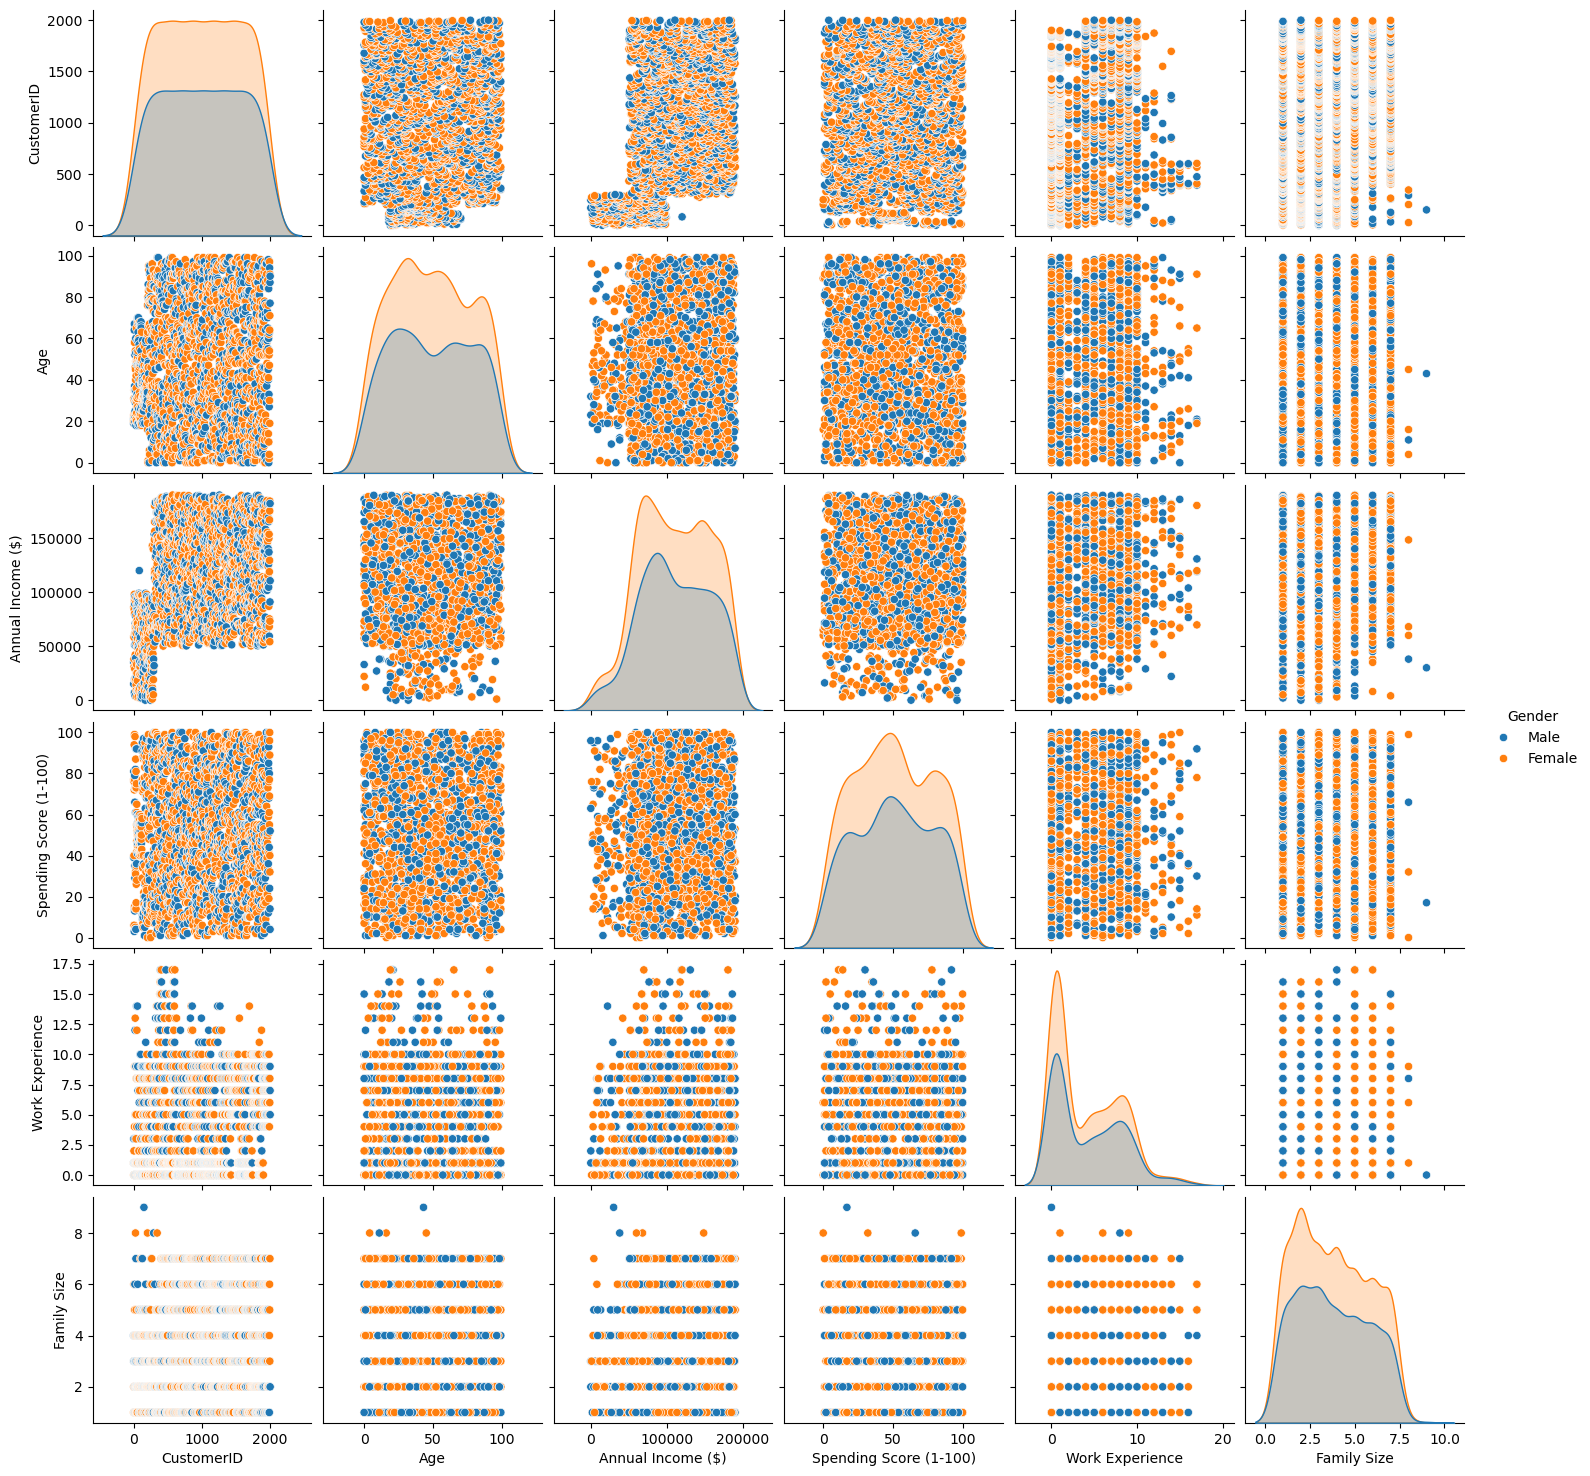

In [12]:
sns.pairplot(customers_df, hue="Gender")

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [14]:
# Prepare data for clustering
X = customers_df[['Annual Income ($)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Calculate elbow curve
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

Text(0.5, 1.0, 'Elbow Method')

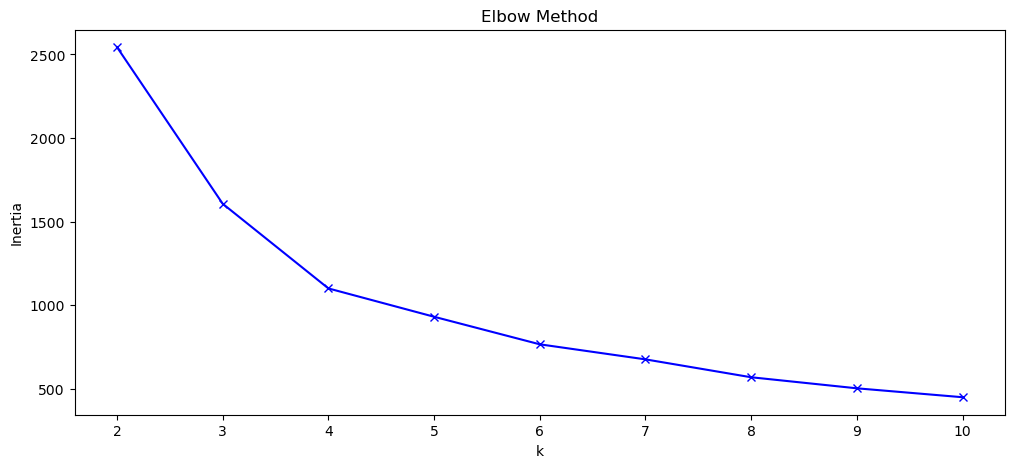

In [16]:
# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')


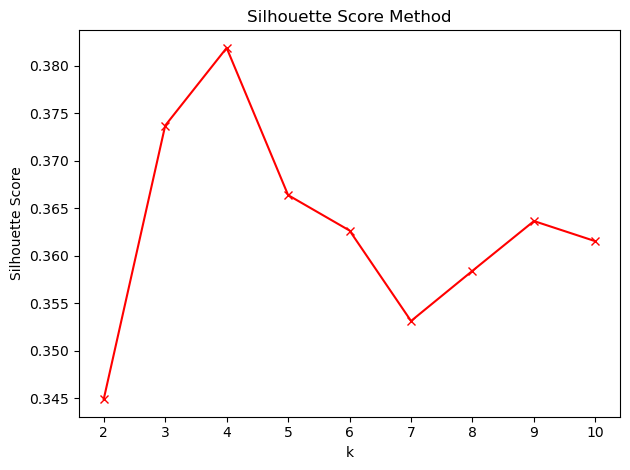

In [17]:
# silhout score 
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.tight_layout()
plt.show()

In [18]:
# Find optimal k using silhouette score
optimal_k = K[np.argmax(silhouette_scores)]
print("Optimal number of clusters based on Silhouette Score:", optimal_k)

Optimal number of clusters based on Silhouette Score: 4


In [62]:
# Perform K-means clustering with optimal k
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = optimal_kmeans.fit_predict(X_scaled)

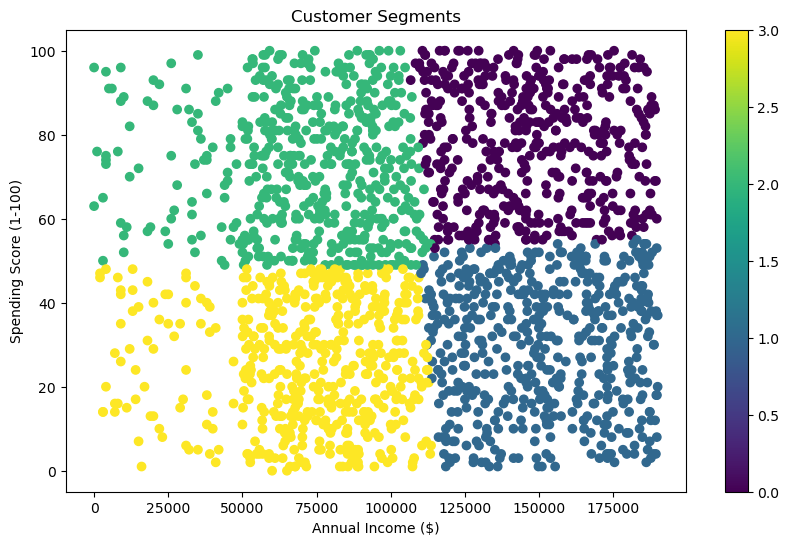

In [20]:
# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], 
                     c=clusters, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

In [21]:
# Count number of customers in each cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()
print("\
Number of customers in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} customers")

Number of customers in each cluster:
Cluster 0: 466 customers
Cluster 1: 518 customers
Cluster 2: 517 customers
Cluster 3: 499 customers


In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

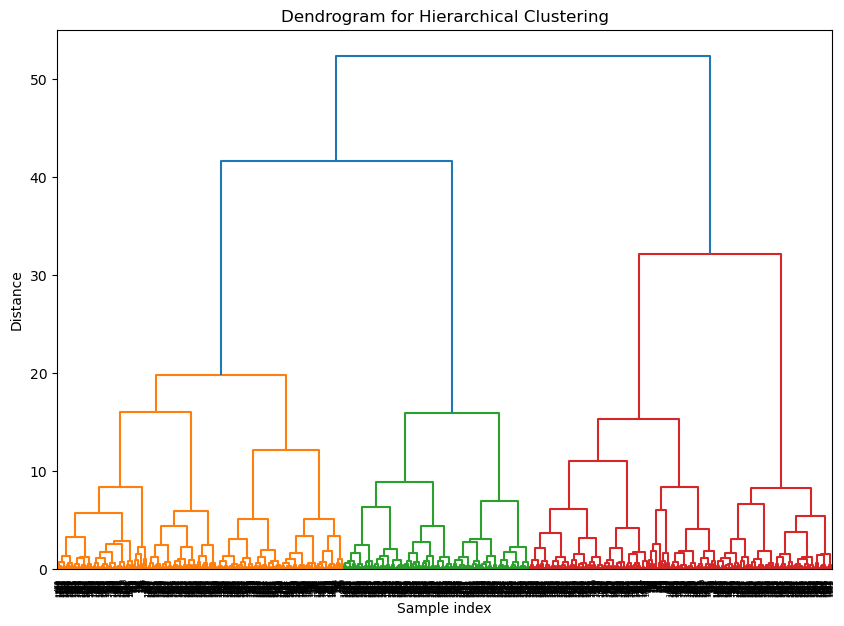

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [25]:
from sklearn.cluster import AgglomerativeClustering

optimal_k = 4 

# Fit hierarchical clustering with the optimal number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
clusters_hierarchical = hierarchical_clustering.fit_predict(X_scaled)

print("Hierarchical clustering completed with " + str(optimal_k) + " clusters.")

Hierarchical clustering completed with 4 clusters.


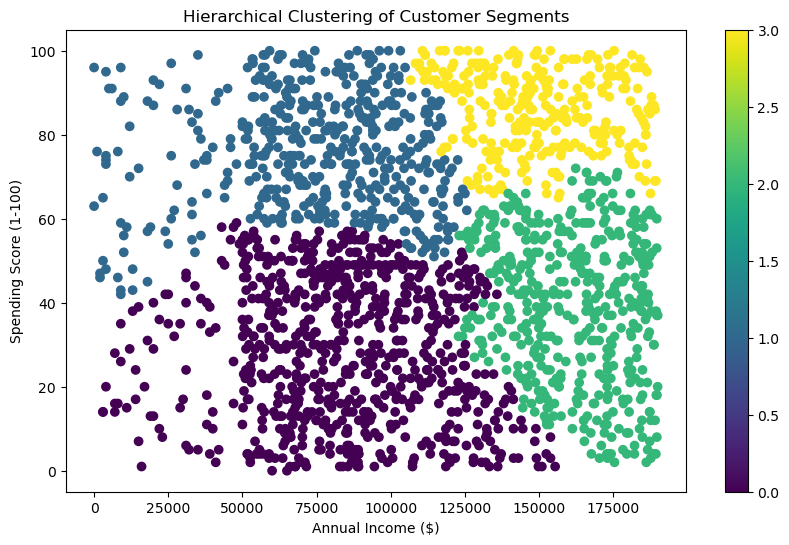

In [26]:
# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], 
                     c=clusters_hierarchical, cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering of Customer Segments')
plt.colorbar(scatter)
plt.show()